In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import warnings
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)


In [20]:
from ml import Ml
from preprocess import Preprocess
from clean_data import CleanData
from plot import Plot

In [181]:
train = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\train.csv',sep=',', parse_dates=['Date'], index_col = 'Date')
test = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\test.csv', engine = 'python',parse_dates=['Date'], index_col = 'Date')
store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\store.csv', engine = 'python')

In [119]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [121]:
train.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(train.shape[0]),str(train.shape[1])))

The Train dataset has 1017209 Rows and 8 Variables


(Store             int64
 DayOfWeek         int64
 Sales             int64
 Customers         int64
 Open              int64
 Promo             int64
 StateHoliday     object
 SchoolHoliday     int64
 dtype: object, None)

In [182]:
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [123]:
test.dtypes,print ("The test dataset has {} Rows and {} Variables".format(str(test.shape[0]),str(test.shape[1])))

The test dataset has 41088 Rows and 8 Variables


(Id                 int64
 Store              int64
 DayOfWeek          int64
 Date              object
 Open             float64
 Promo              int64
 StateHoliday      object
 SchoolHoliday      int64
 dtype: object, None)

In [124]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [125]:
store.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(store.shape[0]),str(store.shape[1])))

The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object, None)

In [126]:
clean = CleanData()
pre = Preprocess()

# Cleaning the data

In [133]:
train.drop('SalePerCustomer', axis=1, inplace=True)

In [138]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844338.000000
mean          9.493641
std           2.197448
min           2.749075
25%           7.895571
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [183]:
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear

In [139]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898
2013-01-01,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818
2013-01-01,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455


## the data show that the average sales per day is around 9.50 but also there is min of 0 meaning there were days with no sales

In [156]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [164]:
pre.get_missing_values(train)

Store              0
DayOfWeek          0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
SalePerCustomer    0
dtype: int64

In [184]:
test['Open'].fillna(0, inplace=True)


In [185]:
pre.get_missing_values(test)

Id               0
Store            0
DayOfWeek        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64

In [153]:
pre.get_missing_values(store)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [157]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,


### there is 172817 rows that stores were closed and also meaning no sales so will drop this cause they have no use for sales prediction

In [158]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946,9.493641
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931,2.197448
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,2.749075
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,7.895571
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,9.250000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,10.899729
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,64.957854


{'Mean': 6955.959133664481, 'Median': 6369.0}

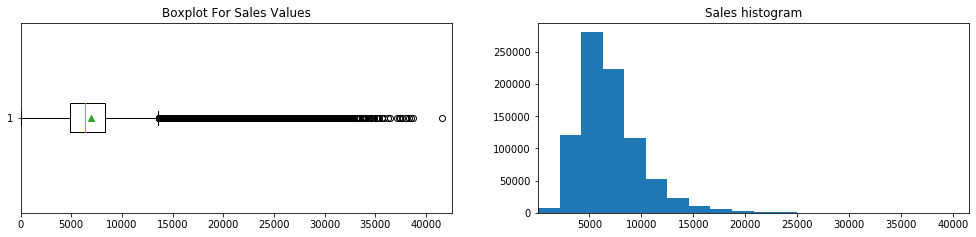

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(train.Sales), max(train.Sales)))

{"Mean":np.mean(train.Sales),"Median":np.median(train.Sales)}

### on some days there were very high sales and on some day there were just too low but these were just cause of extenal factor like promo was up that day or not enough competitor around

In [59]:
train.Customers.describe() 

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

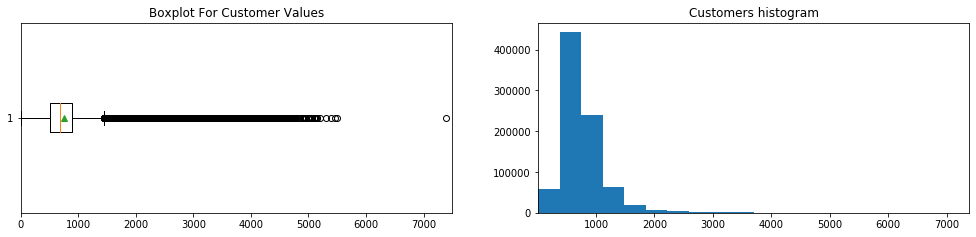

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(train.Customers), max(train.Customers)))

{"Mean":np.mean(train.Customers),"Median":np.median(train.Customers)}

### same story here for the customer column. we see a high amount of customers out of the box. its probaly because there was a promo going on. which shows there is a correlation between sales and customers. also, the mean and median being very close is a good sign of no outliers

In [186]:
# filling missing values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [188]:
# lets deal with the missing values step by step
# this it is only 3 for the Competition Distance and and there is no pattern we will fill it with the median
# since the mean can be affected by outliers
# clean.fix_missing_median(store, 'CompetitionDistance')
store['CompetitionDistance'].fillna(int(store['CompetitionDistance'].median()), inplace=True)
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [189]:
# for the CompetitionOpenSinceMonth and CompetitionOpenSinceYear we don't have any close thing to fill it with so 
# we will just fill it with a 0 value
store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store.CompetitionOpenSinceYear.fillna(0,inplace=True)
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [190]:
store[pd.isnull(store.Promo2SinceWeek)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN


In [191]:
# from the above df we can see that all the remaining NAN values are coming from Promo2 being 0 which in other
# terms means the rest NAN values should be 0 too
store.Promo2SinceWeek.fillna(0,inplace=True)
store.Promo2SinceYear.fillna(0,inplace=True)
store.PromoInterval.fillna(0,inplace=True)
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [178]:
# now that all the data has been clean we will merge the two dataset for better understanding
# the train and store data set
train_store = pd.merge(train, store, how = 'left', on = 'Store')

In [192]:
test_store = pd.merge(test, store, how = 'left', on = 'Store')

In [193]:
pre.get_missing_values(test_store)

Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [196]:
pre.get_missing_values(train_store)

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
SalePerCustomer              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [173]:
train_store["StateHoliday"] = train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1, 0:0})

In [89]:
train_store.drop('Unnamed: 0', axis=1, inplace=True)

In [168]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0.0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0.0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0.0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0.0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0.0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1.0,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844334,733,2,10765,2377,1,0,1.0,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844335,769,2,5035,1248,1,0,1.0,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,4491,1039,1,0,1.0,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [180]:
test_store

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [175]:
train_store.to_csv('../data/train_store.csv')

In [195]:
test_store.to_csv('../data/test_store.csv')